## **LAB 02. Classification**
- Student ID: 22127147

- Full name: Đỗ Minh Huy

### **Self evaluation**
<table border="1" style="border-collapse: collapse; width: 80%;">
    <tr>
        <th style="padding: 8px; text-align: left; border: 1px solid white;">No.</th>
        <th style="padding: 8px; text-align: left; border: 1px solid white;">Details</th>
        <th style="padding: 8px; text-align: center; border: 1px solid white;">Percent</th>
    </tr>
    <tr>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">1</td>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">Classification algorithms implementation</td>
        <td style="padding: 8px; text-align: center; border: 1px solid white;">100%</td>
    </tr>
    <tr>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">2</td>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">Evaluation</td>
        <td style="padding: 8px; text-align: center; border: 1px solid white;">100%</td>
    </tr>
    <tr>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">3</td>
        <td style="padding: 8px; text-align: left; border: 1px solid white;">Comparision and Analysis</td>
        <td style="padding: 8px; text-align: center; border: 1px solid white;">100%</td>
    </tr>
</table>

### **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf

### **Import Dataset**

In [2]:
# Define column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Read the data with explicit engine specification
df = pd.read_csv('adult.data',
                 engine='python',  # Explicitly specify Python engine
                 delimiter=', ',   # Keep your original delimiter
                 na_values="?",    # Handle missing values
                 skipinitialspace=True,
                 names=column_names,
                 header=None)

# Save to CSV if needed
df.to_csv('adult.csv', index=False)

# Convert to numpy array if needed
dataset = np.array(df.values)

### **Preprocessing Data**

##### **Read data**

In [3]:
df = pd.read_csv('adult.csv')

##### **Handle duplicated data**

In [4]:
def get_unique_rows(df):
    """
    Get unique rows from DataFrame, preserving the order of first occurrences.
    
    Parameters:
    - df: Input DataFrame
    
    Returns:
    - unique_df: DataFrame with unique rows
    - indices: List of indices of the unique rows
    """
    # Drop duplicate rows and keep the first occurrence
    unique_df = df.drop_duplicates(keep='first')
    
    # Get the indices of the unique rows
    indices = unique_df.index.tolist()
    
    # Reset index in the result DataFrame if desired (optional)
    unique_df = unique_df.reset_index(drop=True)
    
    return unique_df, indices

unique_data, indices = get_unique_rows(df)

##### **Split data to X set (independent variables) and y set (dependent variables)**

In [5]:
X = unique_data.iloc[:, :-1].values
y = unique_data.iloc[:, -1].values

##### **Fill missing values**

In [6]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, [0,2,4,10,11,12]] = imputer_num.fit_transform(X[:, [0,2,4,10,11,12]])

cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # Imputer for categorical columns
X[:, [1, 3, 5, 6, 7, 8, 9, 13]] = cat_imputer.fit_transform(X[:, [1, 3, 5, 6, 7, 8, 9, 13]])


##### **Encoding**

**Label encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X.shape

(32537, 14)

**One hot encoding**

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), [1, 3, 5, 6, 7, 8, 9, 13])], 
    remainder='passthrough'
)

# Transform X
X = ct.fit_transform(X)

X.shape

(32537, 105)

##### **Split data to training set and test set**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### **Scaling Data**

In [11]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train[:, 99:] = sd.fit_transform(X_train[:, 99:])
X_test[:, 99:] = sd.transform(X_test[:, 99:])

In [12]:
X_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6934427659032133,
       0.5033192274168575, -0.03336459404621121, 0.917417842565309,
       -0.2190286989007215, -0.03305836582993124], dtype=object)

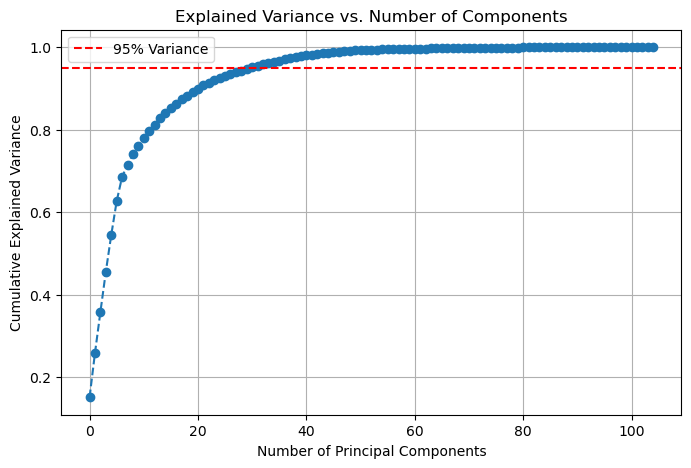

The number of components required to retain 95% of the variance: 31


In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Draw a plot to determine the number of components.
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Determine the number of components required to achieve 95% variance.
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"The number of components required to retain 95% of the variance: {n_components}")

In [14]:
pca = PCA(n_components=n_components, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [15]:
X_train[0]

array([ 0.95819411, -0.38546749,  1.02616719,  0.23741572,  0.55542301,
        0.13223695, -0.60256387, -0.02819521,  0.81459938,  0.86555157,
        0.20432316, -0.64611831, -0.16004732,  0.05170757, -0.40369497,
        0.07107601,  0.49493366,  0.7269655 , -0.1034953 ,  0.11575175,
        0.18697688, -0.23260484, -0.4870948 ,  0.03626476, -0.11121838,
        0.19547622, -0.12825153, -0.03882107, -0.0757119 , -0.0261088 ,
        0.09056368])

### **2. Requirements**

In this lab, I will use RandomizedSearchCV instead of GridSearchCV to reduce the runtime for finding the best hyperparameters. [5],[6],[7]

#### **2.1. Classification algorithms implementation**

##### **1. Decision Tree [1],[14]**

In [16]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

clf = tree.DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 26),
}

# Create GridSearchCV object
grid_clf_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=50,           # Number of random trials
    scoring='accuracy',   # Evaluate by accuracy
    cv=5,                 # Number of cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1             # multi threads
)

# Train GridSearchCV on training set
grid_clf_search.fit(X_train, y_train)

# Find the best parameter
best_clf_params = grid_clf_search.best_params_
best_clf_model = grid_clf_search.best_estimator_

print("Best Parameters:", best_clf_params)

# clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 6, 'criterion': 'gini'}


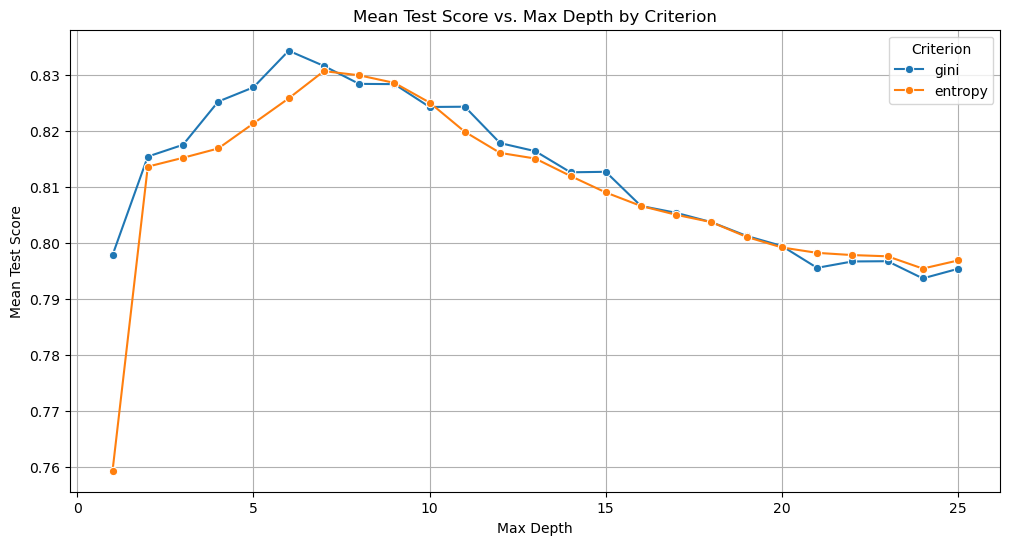

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get result from GridSearchCV
results = pd.DataFrame(grid_clf_search.cv_results_)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=results,
    x='param_max_depth', 
    y='mean_test_score',
    hue='param_criterion',
    marker='o'
)
plt.title('Mean Test Score vs. Max Depth by Criterion')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend(title='Criterion')
plt.grid(True)
plt.show()

**When using the Gini criterion:**

- The mean test score increases rapidly as Max Depth rises from 1 to around 6.
- Afterward, the mean test score gradually decreases as Max Depth increases to 20 and 25.
- The highest mean test score is approximately 0.835 at Max Depth = 6.

**When using the Entropy criterion:**

- A similar trend is observed as with the Gini criterion, with the mean test score increasing rapidly from Max Depth = 1 to around 6–7.
- Then, the mean test score gradually decreases as Max Depth increases to 20 and 25.
- The highest mean test score is approximately 0.83 at Max Depth = 7-8.

**Comparison between the two criteria:**

- The Gini criterion outperforms the Entropy criterion in the range of Max Depth from 6-7.
- Outside this range, both criteria yield similar results.

**Conclusion:**
- Based on the chart, it can be concluded that using the Gini criterion with a Max Depth is 6 provides the best model performance.

In [18]:
y_clf_pred = best_clf_model.predict(X_test)

##### **2. Ensemble Model: Random Forest [2]**

Bootstrap means that instead of training on all the observations, each tree of RF is trained on a subset of the observations. The chosen subset is called the bag, and the remaining are called Out of Bag samples. Multiple trees are trained on different bags, and later the results from all the trees are aggregated.

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc  = RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(5, 50, 5),
    'max_features': np.arange(2, 15),
    'bootstrap': [True, False]    
}

# Create GridSearchCV object
grid_rfc_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid,
    n_iter=100,           # Number of random trials
    scoring='accuracy',   # Evaluate by accuracy
    cv=5,                 # Number of cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1             # multi threads
)

# Train GridSearchCV on training set
grid_rfc_search.fit(X_train, y_train)

# Find the best parameter
best_rfc_params = grid_rfc_search.best_params_
best_rfc_model = grid_rfc_search.best_estimator_

print("Best Parameters:", best_rfc_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 40, 'max_features': 12, 'bootstrap': True}


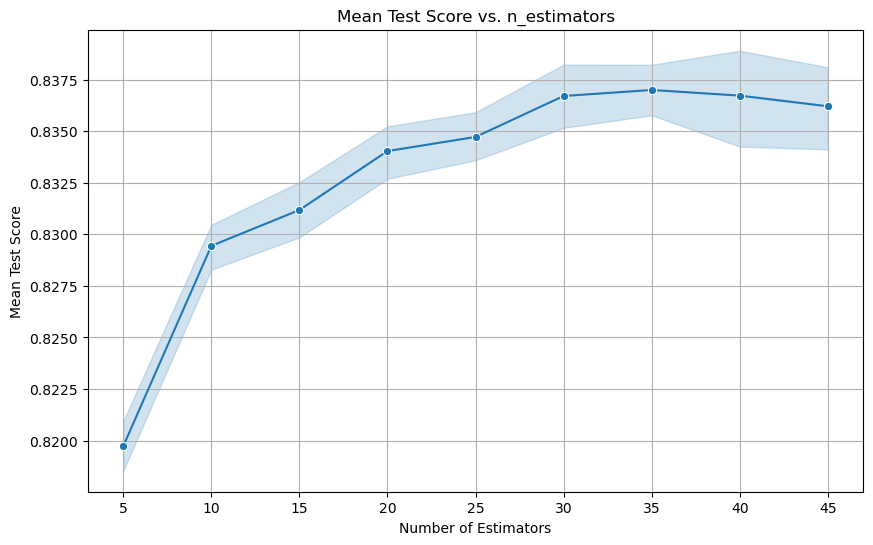

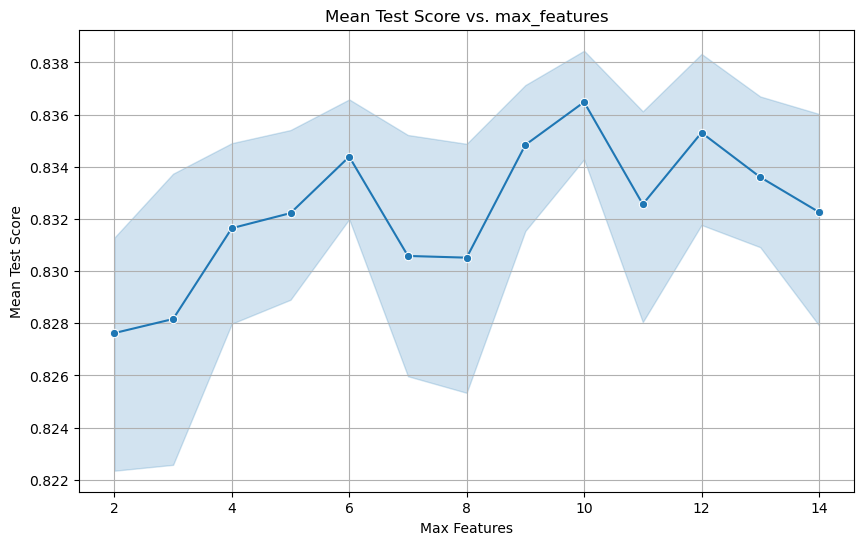

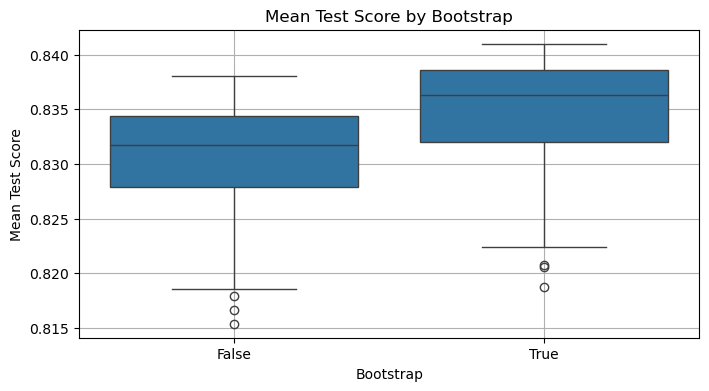

In [20]:
# Get results from RandomizedSearchCV
results = pd.DataFrame(grid_rfc_search.cv_results_)

# Chart 1: Relationship between n_estimators and mean_test_score.
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results,
    x='param_n_estimators',
    y='mean_test_score',
    marker='o'
)
plt.title('Mean Test Score vs. n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Chart 2: Relationship between max_features and mean_test_score.
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results,
    x='param_max_features',
    y='mean_test_score',
    marker='o'
)
plt.title('Mean Test Score vs. max_features')
plt.xlabel('Max Features')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Chart 3: Performance based on Bootstrap.
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=results,
    x='param_bootstrap',
    y='mean_test_score'
)
plt.title('Mean Test Score by Bootstrap')
plt.xlabel('Bootstrap')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

**1. Mean Test Score vs. n_estimators**

- **Trend:** The mean test score gradually increases as the value of n_estimators rises from 5 to around 35. After that, the score fluctuates but tends to stabilize at higher values.
- **Peak Point:** The optimal value appears to be in the range of n_estimators = 35 or 40, where the score reaches its highest level (~0.836).
- **Suggestion:** Use n_estimators in the range of 35–40 to achieve good performance.

**2. Mean Test Score vs. max_features**

- **Peak Point:** The best value seems to be at max_features = 10, where the mean test score reaches its highest point (~0.836), and if the max_features = 12 the mae = 0.835.
- **Suggestion:** To optimize the model, we can choose max_features equal to 10 or 12.

**3. Mean Test Score vs. Bootstrap**

- When Bootstrap = False (using the entire dataset), the mean test score is around 0.8325.
- When Bootstrap = True (using sampling with replacement), the mean test score is higher, approximately 0.8375.
- This indicates that using Bootstrap improves the model's performance, resulting in a higher test score compared to not using Bootstrap.

$\implies$ The best parameters: n_estimators = 40, max_features = 12, bootstrap = True.

In [21]:
y_rfc_pred = best_rfc_model.predict(X_test)

##### **3. Naive Bayes [3], [4]**


In [22]:
X_train[0, :]

array([ 0.95819411, -0.38546749,  1.02616719,  0.23741572,  0.55542301,
        0.13223695, -0.60256387, -0.02819521,  0.81459938,  0.86555157,
        0.20432316, -0.64611831, -0.16004732,  0.05170757, -0.40369497,
        0.07107601,  0.49493366,  0.7269655 , -0.1034953 ,  0.11575175,
        0.18697688, -0.23260484, -0.4870948 ,  0.03626476, -0.11121838,
        0.19547622, -0.12825153, -0.03882107, -0.0757119 , -0.0261088 ,
        0.09056368])

Our dataset is no longer binary (0,1), so we cannot use Bernoulli Naive Bayes and can only use Gaussian Naive Bayes in this case.

**Gaussian Naive Bayes**

The var_smoothing parameter adds a small value to the variance of each feature to ensure numerical stability, preventing division by zero or very small numbers. The default value for var_smoothing is 1e-9. In practice, values between 1e-12 and 1e-5 are commonly used depending on the dataset's properties.

In [23]:
from sklearn.naive_bayes import GaussianNB
gNB  = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-12, -5, num=100),  # Logarithmic scale
}

# Create GridSearchCV object
grid_gNB_search = RandomizedSearchCV(
    estimator=gNB,
    param_distributions=param_grid,
    n_iter=100,           # Number of random trials
    scoring='accuracy',   # Evaluate by accuracy
    cv=5,                 # Number of cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1             # multi threads
)

grid_gNB_search.fit(X_train, y_train)

# Find the best parameter
best_gNB_params = grid_gNB_search.best_params_
best_gNB_model = grid_gNB_search.best_estimator_

print("Best Parameters:", best_gNB_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 1e-12}


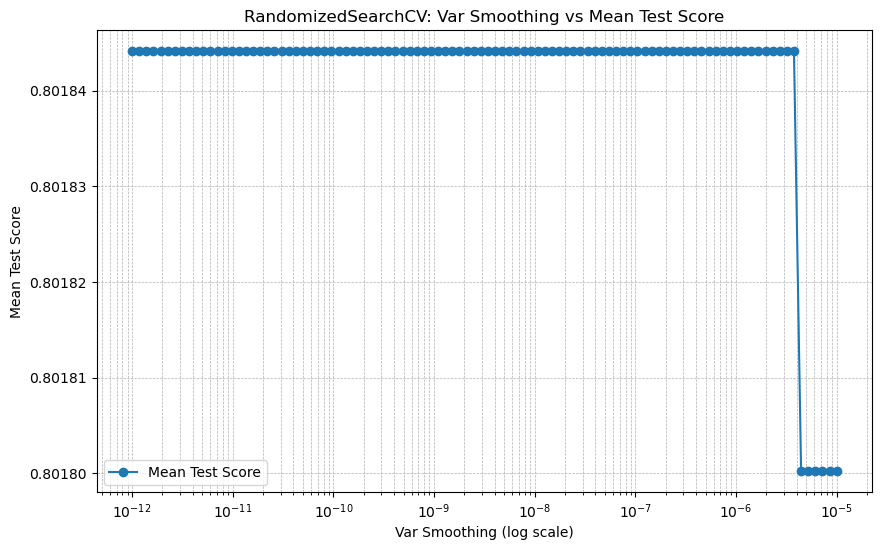

In [24]:
# Extract results from RandomizedSearchCV
results = grid_gNB_search.cv_results_

# Get var_smoothing and mean_test_score
param_var_smoothing = results['param_var_smoothing'].data.astype(float)
mean_test_score = results['mean_test_score']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(param_var_smoothing, mean_test_score, marker='o', linestyle='-', label="Mean Test Score")
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Var Smoothing (log scale)')
plt.ylabel('Mean Test Score')
plt.title('RandomizedSearchCV: Var Smoothing vs Mean Test Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


It can be easily observed that the mean test score, equal to 0.80185, remains constant for var smoothing in the range from 1e-12 to 1e-6. Values approaching 1e-5, around 8e-6, result in a mean test score approximately equal to 0.8018.

In [25]:
y_gNB_pred = best_gNB_model.predict(X_test)

##### **4. Support Vector Machine (SVM)**

- Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

- The C parameter in Support Vector Machines (SVM) plays a important role in determining the trade-off between the model's ability to correctly classify training examples and the maximization of the margin. The purpose of the C parameter is to control the misclassification penalty during the training process. It allows us to adjust the balance between achieving a wider margin and allowing misclassifications.

    - A smaller value of C puts more emphasis on maximizing the margin rather than classifying all training examples correctly. In other words, a smaller C allows for more misclassifications but promotes a wider margin. This can be useful when dealing with noisy or overlapping data points, as a wider margin might help to reduce overfitting and improve the generalization ability of the model.

    - On the other hand, a larger value of C puts more emphasis on classifying all training examples correctly, even if it means sacrificing the margin. A larger C leads to a narrower margin, potentially resulting in overfitting if the data is not well-separated. In such cases, the model might become too sensitive to individual data points, leading to poor generalization on unseen data.

In [27]:
from sklearn.svm import SVC
svc = SVC()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [2**i for i in range(-5, 5)],
    'gamma': [2**i for i in range(-5, 5)],
}

# Create GridSearchCV object
grid_svc_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_grid,
    n_iter=4,           # Number of random trials
    scoring='accuracy',   # Evaluate by accuracy
    cv=5,                 # Number of cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1             # multi threads
)

grid_svc_search.fit(X_train, y_train)

# Find the best parameter
best_svc_params = grid_svc_search.best_params_
best_svc_model = grid_svc_search.best_estimator_

print("Best Parameters:", best_svc_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'kernel': 'linear', 'gamma': 4, 'C': 8}


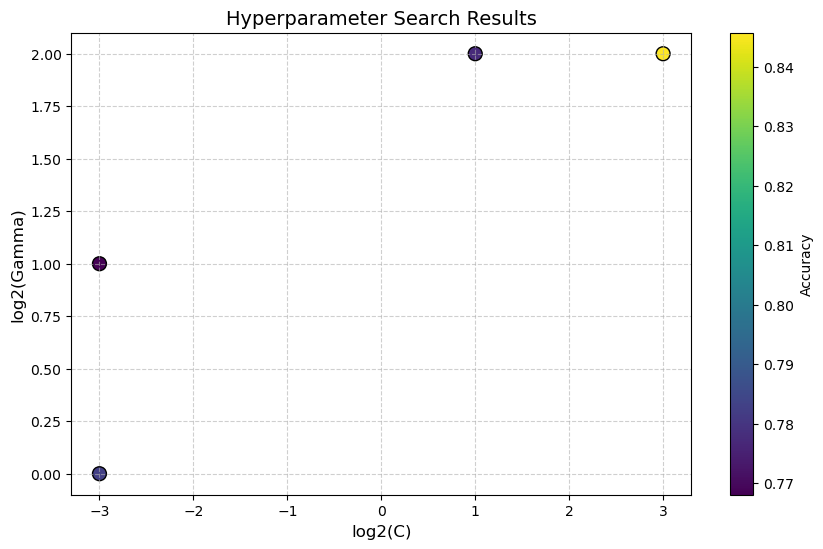

In [28]:
# Extract results from the GridSearchCV object
results = grid_svc_search.cv_results_

# Get the hyperparameter values and mean test scores
C_values = [param['C'] for param in results['params']]
gamma_values = [param['gamma'] for param in results['params']]
mean_test_scores = results['mean_test_score']

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(np.log2(C_values), np.log2(gamma_values), c=mean_test_scores, cmap='viridis', s=100, edgecolors='k')
plt.colorbar(scatter, label='Accuracy')

# Add labels and title
plt.xlabel('log2(C)', fontsize=12)
plt.ylabel('log2(Gamma)', fontsize=12)
plt.title('Hyperparameter Search Results', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

Looking at the chart, we can observe that when log2(C) 3 and loc(gamma)  = 2, there is a bright yellow area, representing high accuracy greater than 0.84. Therefore, log2(C) = 3 implies C = 8, and log2(gamma) = 2 implies gamma = 4.

Thus, the optimal parameters for this SVM model are: kernel = linear, C = 8, gamma = 4.

##### **5. Neural Network: Multilayer Perceptron (MLP) [11]**


In [56]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(8,5,j) for j in range (2, 8)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [500]
}

# Create GridSearchCV object
grid_mlp_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid,
    n_iter=100,           # Number of random trials
    scoring='accuracy',   # Evaluate by accuracy
    cv=5,                 # Number of cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1             # multi threads
)

grid_mlp_search.fit(X_train, y_train)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(8, 5, 2),
                                                               (8, 5, 3),
                                                               (8, 5, 4),
                                                               (8, 5, 5),
                                                               (8, 5, 6),
                                                               (8, 5, 7)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'max_iter': [500]},
                   random_state=42, scoring='accuracy', verbose=1)

In [57]:
# Find the best parameter
best_mlp_params = grid_mlp_search.best_params_
best_mlp_model = grid_mlp_search.best_estimator_

print("Best Parameters:", best_mlp_params)

Best Parameters: {'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (8, 5, 3), 'activation': 'tanh'}


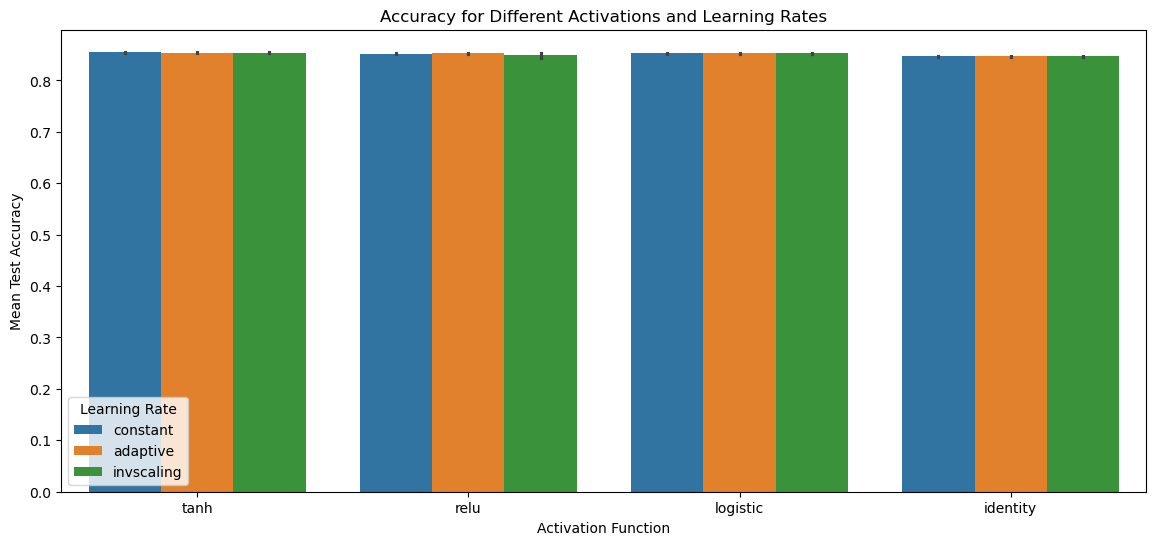

In [58]:
results = grid_mlp_search.cv_results_

df_results = pd.DataFrame(results)

df_results = df_results[['param_hidden_layer_sizes', 'param_activation', 
                         'param_learning_rate', 'mean_test_score']]

df_results = df_results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x='param_activation',
    y='mean_test_score',
    hue='param_learning_rate',
    data=df_results,
)
plt.title("Accuracy for Different Activations and Learning Rates")
plt.ylabel("Mean Test Accuracy")
plt.xlabel("Activation Function")
plt.legend(title="Learning Rate")
plt.show()


It can be easily observed that using tanh, relu, or logistic results in the same accuracy across all three learning rates. Therefore, we can freely choose any of them (or use the best parameters suggested by the algorithm).

Here, we select activation = tanh and learning_rate = invscaling.

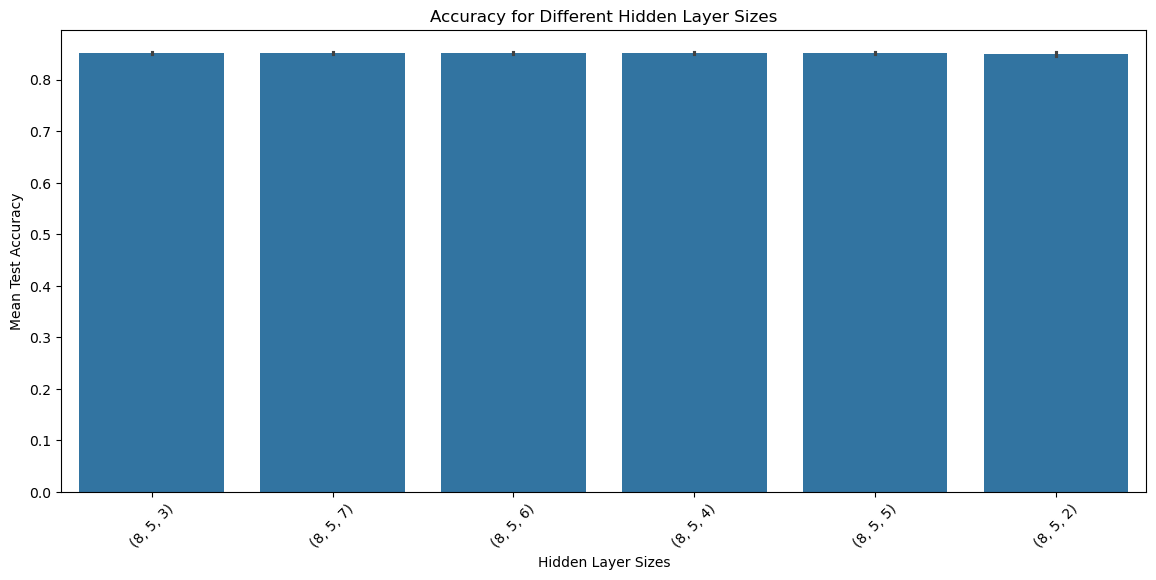

In [59]:
df_results['param_hidden_layer_sizes'] = df_results['param_hidden_layer_sizes'].astype(str)

plt.figure(figsize=(14, 6))
sns.barplot(
    x='param_hidden_layer_sizes',
    y='mean_test_score',
    data=df_results,
)
plt.title("Accuracy for Different Hidden Layer Sizes")
plt.ylabel("Mean Test Accuracy")
plt.xlabel("Hidden Layer Sizes")
plt.xticks(rotation=45)
plt.show()

In this chart, it can also be observed that the hidden layer sizes with the third layer being any value produce the same accuracy. Therefore, we can freely choose any configuration or select the one suggested by the algorithm, which is (8, 5, 3).

#### **2.2. Evaluation**

##### **1. Decision Tree**

**Train model**

In [33]:
best_clf = tree.DecisionTreeClassifier(**best_clf_params)

best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

**Predict the output**

In [34]:
y_clf_pred = best_clf.predict(X_test)

- **Performance Overview:**
    - **Accuracy:** Overall percentage of correct predictions.
    - **Confusion Matrix:** Visualize using a heatmap for a detailed summary of predictions. [12]

Accuracy: 83.69%


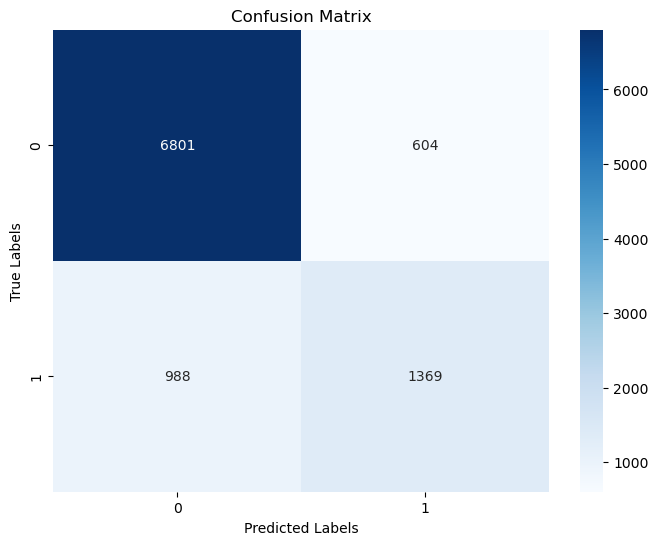

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Generate the confusion matrix
cm_clf = confusion_matrix(y_test, y_clf_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_clf_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2%}")  # Display as a percentage

# Option 1: Using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

- **Metrics for Positive and Negative Classes:**

    - **Precision:** Proportion of correctly predicted positives out of all predicted positives.

    - **Recall (Sensitivity or True Positive Rate):** Proportion of actual positives correctly identified.

    - **Specificity (True Negative Rate):** Proportion of actual negatives that correctly identified.

    - **F1 Score:** Harmonic mean of Precision and Recall, balancing their trade-off.

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_clf_pred, average='binary')  # 'binary' for two classes

# Recall (Sensitivity): TP / (TP + FN)
recall = recall_score(y_test, y_clf_pred, average='binary')

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_clf_pred, average='binary')

tn, fp, fn, tp = cm_clf.ravel()

# Specificity
specificity = tn / (tn + fp)

# Print metrics
print(f"Precision: {precision:.2%}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Print Specificity
print(f"Specificity: {specificity:.2%}")

# Get a full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_clf_pred))

Precision: 69.39%
Recall (Sensitivity): 58.08%
F1 Score: 63.23%
Specificity: 91.84%

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7405
           1       0.69      0.58      0.63      2357

    accuracy                           0.84      9762
   macro avg       0.78      0.75      0.76      9762
weighted avg       0.83      0.84      0.83      9762



##### **2. Ensemble Model: Random Forest**

**Train model**

In [37]:
best_rfc = RandomForestClassifier(**best_rfc_params)

best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=12, n_estimators=40)

**Predict the output**

In [38]:
y_rfc_pred = best_rfc.predict(X_test)

- **Performance Overview:**
    - **Accuracy:** Overall percentage of correct predictions.
    - **Confusion Matrix:** Visualize using a heatmap for a detailed summary of predictions.

Accuracy: 84.09%


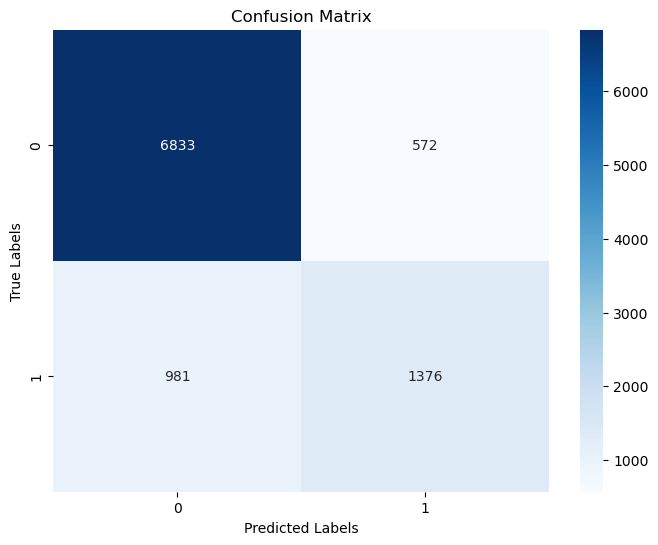

In [39]:
# Generate the confusion matrix
cm_rfc = confusion_matrix(y_test, y_rfc_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_rfc_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2%}")  # Display as a percentage

# Option 1: Using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

- **Metrics for Positive and Negative Classes:**

    - **Precision:** Proportion of correctly predicted positives out of all predicted positives.

    - **Recall (Sensitivity or True Positive Rate):** Proportion of actual positives correctly identified.

    - **Specificity (True Negative Rate):** Proportion of actual negatives that correctly identified.

    - **F1 Score:** Harmonic mean of Precision and Recall, balancing their trade-off.

In [40]:
# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_rfc_pred, average='binary')  # 'binary' for two classes

# Recall (Sensitivity): TP / (TP + FN)
recall = recall_score(y_test, y_rfc_pred, average='binary')

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_rfc_pred, average='binary')

tn, fp, fn, tp = cm_rfc.ravel()

# Specificity
specificity = tn / (tn + fp)

# Print metrics
print(f"Precision: {precision:.2%}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Print Specificity
print(f"Specificity: {specificity:.2%}")

# Get a full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_rfc_pred))

Precision: 70.64%
Recall (Sensitivity): 58.38%
F1 Score: 63.93%
Specificity: 92.28%

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7405
           1       0.71      0.58      0.64      2357

    accuracy                           0.84      9762
   macro avg       0.79      0.75      0.77      9762
weighted avg       0.83      0.84      0.84      9762



##### **3. Naive Bayes**

**Train model**

In [41]:
best_gNB = GaussianNB(**best_gNB_params)

best_gNB.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-12)

**Predict the output**

In [42]:
y_gNB_pred = best_gNB.predict(X_test)

- **Performance Overview:**
    - **Accuracy:** Overall percentage of correct predictions.
    - **Confusion Matrix:** Visualize using a heatmap for a detailed summary of predictions.

Accuracy: 79.49%


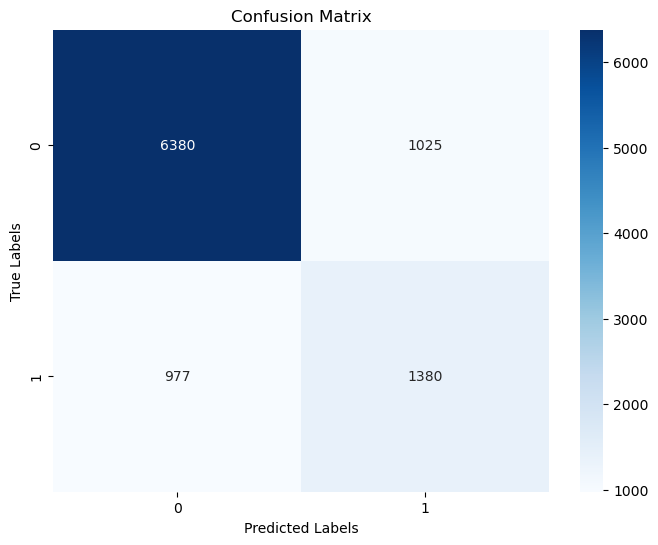

In [43]:
# Generate the confusion matrix
cm_gNB = confusion_matrix(y_test, y_gNB_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_gNB_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2%}")  # Display as a percentage

# Option 1: Using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gNB, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

- **Metrics for Positive and Negative Classes:**

    - **Precision:** Proportion of correctly predicted positives out of all predicted positives.

    - **Recall (Sensitivity or True Positive Rate):** Proportion of actual positives correctly identified.

    - **Specificity (True Negative Rate):** Proportion of actual negatives that correctly identified.

    - **F1 Score:** Harmonic mean of Precision and Recall, balancing their trade-off.

In [44]:
# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_gNB_pred, average='binary')  # 'binary' for two classes

# Recall (Sensitivity): TP / (TP + FN)
recall = recall_score(y_test, y_gNB_pred, average='binary')

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_gNB_pred, average='binary')

tn, fp, fn, tp = cm_gNB.ravel()

# Specificity
specificity = tn / (tn + fp)

# Print metrics
print(f"Precision: {precision:.2%}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Print Specificity
print(f"Specificity: {specificity:.2%}")

# Get a full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_gNB_pred))

Precision: 57.38%
Recall (Sensitivity): 58.55%
F1 Score: 57.96%
Specificity: 86.16%

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7405
           1       0.57      0.59      0.58      2357

    accuracy                           0.79      9762
   macro avg       0.72      0.72      0.72      9762
weighted avg       0.80      0.79      0.80      9762



##### **4. Support Vector Machine (SVM) [8], [9], [10]**

**Train model**

In [45]:
best_svc_params['probability'] = True # turn probability to True for being used in ROC
best_svm = SVC(**best_svc_params)

best_svm.fit(X_train, y_train)

SVC(C=8, gamma=4, kernel='linear', probability=True)

**Predict the output**

In [46]:
y_svm_pred = best_svm.predict(X_test)

- **Performance Overview:**
    - **Accuracy:** Overall percentage of correct predictions.
    - **Confusion Matrix:** Visualize using a heatmap for a detailed summary of predictions.

Accuracy: 84.74%


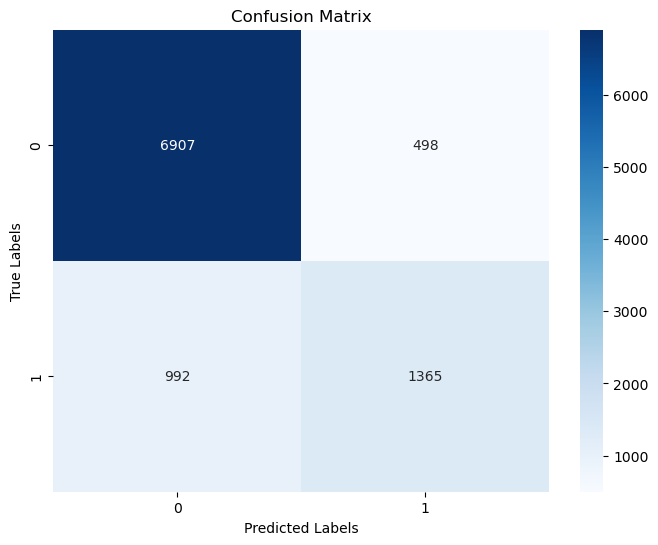

In [47]:
# Generate the confusion matrix
cm_svm = confusion_matrix(y_test, y_svm_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_svm_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2%}")  # Display as a percentage

# Option 1: Using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

- **Metrics for Positive and Negative Classes:**

    - **Precision:** Proportion of correctly predicted positives out of all predicted positives.

    - **Recall (Sensitivity or True Positive Rate):** Proportion of actual positives correctly identified.

    - **Specificity (True Negative Rate):** Proportion of actual negatives that correctly identified.

    - **F1 Score:** Harmonic mean of Precision and Recall, balancing their trade-off.

In [48]:
# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_svm_pred, average='binary')  # 'binary' for two classes

# Recall (Sensitivity): TP / (TP + FN)
recall = recall_score(y_test, y_svm_pred, average='binary')

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_svm_pred, average='binary')

tn, fp, fn, tp = cm_svm.ravel()

# Specificity
specificity = tn / (tn + fp)

# Print metrics
print(f"Precision: {precision:.2%}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Print Specificity
print(f"Specificity: {specificity:.2%}")

# Get a full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_svm_pred))

Precision: 73.27%
Recall (Sensitivity): 57.91%
F1 Score: 64.69%
Specificity: 93.27%

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7405
           1       0.73      0.58      0.65      2357

    accuracy                           0.85      9762
   macro avg       0.80      0.76      0.77      9762
weighted avg       0.84      0.85      0.84      9762



##### **5. Neural Network: Multilayer Perceptron (MLP)**

**Train model**

In [60]:
best_mlp = MLPClassifier(**best_mlp_params)

best_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 5, 3), max_iter=500)

**Predict the output**

In [61]:
y_mlp_pred = best_mlp.predict(X_test)

- **Performance Overview:**
    - **Accuracy:** Overall percentage of correct predictions.
    - **Confusion Matrix:** Visualize using a heatmap for a detailed summary of predictions.

Accuracy: 85.26%


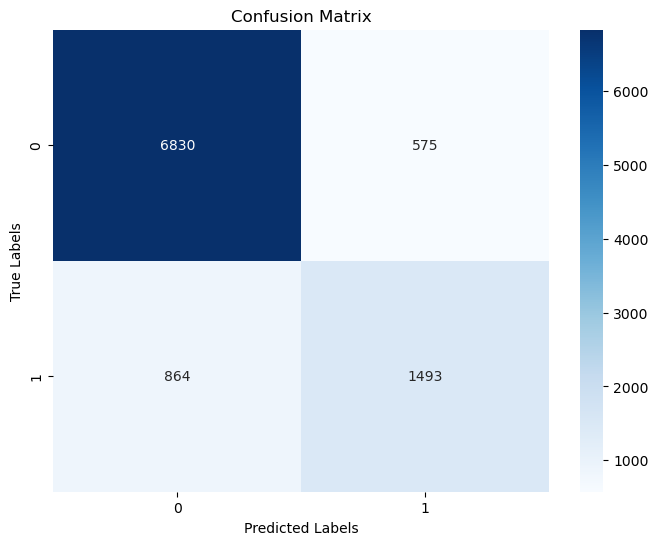

In [62]:
# Generate the confusion matrix
cm_mlp = confusion_matrix(y_test, y_mlp_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_mlp_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2%}")  # Display as a percentage

# Option 1: Using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

- **Metrics for Positive and Negative Classes:**

    - **Precision:** Proportion of correctly predicted positives out of all predicted positives.

    - **Recall (Sensitivity or True Positive Rate):** Proportion of actual positives correctly identified.

    - **Specificity (True Negative Rate):** Proportion of actual negatives that correctly identified.

    - **F1 Score:** Harmonic mean of Precision and Recall, balancing their trade-off.

In [63]:
# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_mlp_pred, average='binary')  # 'binary' for two classes

# Recall (Sensitivity): TP / (TP + FN)
recall = recall_score(y_test, y_mlp_pred, average='binary')

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_mlp_pred, average='binary')

tn, fp, fn, tp = cm_mlp.ravel()

# Specificity
specificity = tn / (tn + fp)

# Print metrics
print(f"Precision: {precision:.2%}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Print Specificity
print(f"Specificity: {specificity:.2%}")

# Get a full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_mlp_pred))

Precision: 72.20%
Recall (Sensitivity): 63.34%
F1 Score: 67.48%
Specificity: 92.23%

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7405
           1       0.72      0.63      0.67      2357

    accuracy                           0.85      9762
   macro avg       0.80      0.78      0.79      9762
weighted avg       0.85      0.85      0.85      9762



##### **2.2.1 Model Discrimination Ability:**
- ROC Curve and AUC Score: Plot ROC curves for all models on the same graph and compute the Area Under the Curve (AUC) to compare performance. [13]


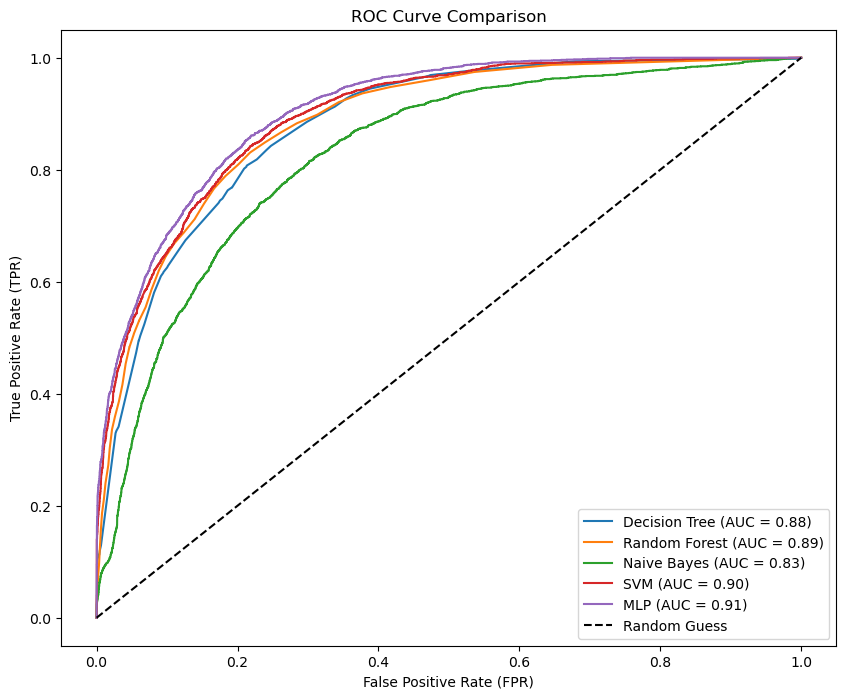

In [64]:
from sklearn.metrics import roc_curve, auc

# Example with Multiple Models
models = {'Decision Tree': best_clf, 'Random Forest': best_rfc, 'Naive Bayes': best_gNB, 'SVM': best_svm, 'MLP': best_mlp}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  # Use predict_proba for each model
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add Random Guess Line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and Legends
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()



- Models with High AUC (Area Under the Curve):

    - MLP (AUC = 0.91): This model has the highest AUC, indicating the best overall discrimination ability between classes among the tested models.
    - Random Forest (AUC = 0.89): Slightly below the SVM and MLP, this model also performs well in distinguishing between positive and negative classes.
    - Decision Tree (AUC = 0.88): Its performance is similar to Random Forest but slightly worse due to overfitting tendencies in single trees.

- Moderate Performers:

    - SVM (AUC = 0.90): Performs similarly to the MLP, which is competitive but not as robust as MLP in this dataset.
    - Naive Bayes (AUC = 0.83): Shows the lowest AUC among all, indicating its simplicity might not capture the complexity of the dataset as well as the other models.

- Baseline Comparison:

    - Random Guess Line (AUC = 0.50): This dashed diagonal line represents the performance of a random classifier. All models perform significantly better than this baseline.


##### **Conclusion**

Based on the confusion matrix and accuracy above, the accuracy for SVM and MLP is the highest at 85%, followed by Decision Tree and Random Forest with an accuracy equal to 84%, and finally, Naive Bayes has the lowest accuracy.

**Trade-offs:**

- **Naive Bayes:** This is the classification model with the fastest training time, as shown in the experiment above. However, the accuracy of Naive Bayes is the lowest among the models. Additionally, its AUC of 0.83 is also the lowest, indicating that its performance is the weakest among the five models.

- **SVM:** SVM is one of the two models with the highest accuracy, but it has the longest training time compared to the other models. Its AUC ranks second (just slightly behind MLP), showing that SVM is a strong model for classification. However, this comes at the cost of a longer training time.

- **Decision Tree:** This is arguably the simplest and easiest model to implement among the ones considered here. However, its effectiveness and accuracy should not be underestimated. The metrics show that the performance of Decision Tree is very high and not much inferior to more complex models like Random Forest, MLP, or SVM. Its accuracy reaches 83.xx%, just slightly behind the others, and its AUC of 0.88 is also a very high value (ranking fourth slightly after MLP and Random Forest, and comparable to SVM). However, a trade-off is that it can suffer from overfitting, leading to poor performance on new data. Nevertheless, the sklearn library provides parameters like max_depth and min_samples_leaf to mitigate this issue by implementing pruning techniques.

- **Random Forest:** This is an improved version of Decision Tree, leveraging multiple Decision Trees to evaluate their performance and then selecting the best-performing one. This significantly mitigates overfitting in Decision Trees and enhances its performance. This improvement is reflected in metrics such as accuracy = 0.84 and AUC = 0.89, both of which are very high, thirdly only to MLP and SVM. However, the training time for Random Forest increases due to the use of multiple Decision Trees instead of just one. Fortunately, the sklearn library provides parameters like max_features (to reduce the number of features) and n_jobs=-1 (to utilize multi-threading) to optimize the process.

- **MLP:** In my opinion, this is the best model among those evaluated on the given dataset. With an accuracy of 85% and AUC of 0.91, these are truly impressive metrics. The training time is relatively reasonable, although longer than simpler models like Naive Bayes and Decision Tree (but still acceptable). However, if the number of layers is large or the number of neurons in each layer is significant, more time may be required. If the training time is too short, the model may not converge (i.e., it may not optimize the error). This could be considered a drawback of MLP. Nevertheless, I believe its accuracy could improve further as a result of such adjustments. In summary, you cannot have everything, but overall, MLP is, in my opinion, the most effective model in this context.

#### **2.3. Comparison and Analysis**


- After implementing and evaluating all classification algorithms, analyze their performance across all metrics and provide detailed insights:
    - Compare on evaluation metrics, such as accuracy, etc., to identify the best-performing model.
    - Use the confusion matrix to analyze misclassifications and discuss potential behind reason (e.g., class imbalance).
    - Compare runtime and scalability, noting trade-offs between speed and prediction quality.
    - Recommend the best model(s) based on evaluation metrics, computational cost, and dataset characteristics.



Let's analyze the performance of the 5 machine learning models based on the evaluation metrics, confusion matrices, and computational considerations:

**Performance Comparison:**

The model with the highest Area Under the Curve (AUC) is MLP at 0.91, indicating the best overall performance.
Random Forest and SVM also have strong AUC values of 0.89 and 0.90 respectively, suggesting they are also high-performing models.
Naive Bayes has the lowest AUC at 0.83, indicating it is the weakest performing model among the ones shown.

**Accuracy:**

- Random Forest: 84.09%
- MLP: 85.26%
- SVM: 84.74%
- Decision Tree: 83.69%
- Naive Bayes: 79.49%

$\implies$ The MLP has the highest accuracy at 85.26%.

**Runtime and Scalability:**

**1. Decision Tree**
- The Decision Tree model has a training time of less than 1 second and a hyperparameter tuning time of less than 1 minute. However, its accuracy is remarkably high, reaching up to 84%. That said, if applied to larger datasets, the Decision Tree might become less effective (e.g., for multi-class classification). Additionally, Decision Trees are prone to overfitting since we are using only a single tree to fit the data. This can result in reduced prediction accuracy on new datasets.

**2. Random Forest**
- Random Forest has a training time of about 1 minute and a hyperparameter tuning time of around 5-10 minutes. As an improved version of Decision Tree, instead of using a single tree to fit the data, Random Forest utilizes multiple trees (depending on the number of estimators used). It then selects the best tree to fit the data, reducing the risk of overfitting. This makes it suitable for larger datasets, though it's important to consider that the runtime can be significantly longer.

**3. Naive Bayes**
- Naive Bayes is a simple model with very fast training and hyperparameter tuning times (in this case, it took less than 10 seconds). However, the trade-off is that its accuracy and performance are quite low (the lowest among all the models in this analysis). While it offers quick runtime, its accuracy and efficiency fall short of expectations, making it a model I would not recommend for use.

**4. SVM**
- SVM is an improved model compared to simple linear classifiers. It introduces the concept of a margin, which measures the distance from the closest data points of each class to the decision boundary. SVM aims to maximize this margin while ensuring that the boundary is equidistant from both classes. This approach leads to better classification performance as it clearly separates the two classes.

- This characteristic becomes particularly important later, as you'll see that Support Vector Machine often outperforms Neural Networks with a single layer, such as the Perceptron Learning Algorithm (PLA).

- Although the training time and hyperparameter tuning for SVM can be quite lengthy—around 5 minutes (or longer for larger datasets)—the model delivers exceptional results, achieving an AUC of 0.90 and an accuracy of up to 85%. It can be effectively used with larger datasets, provided there is sufficient preprocessing (perhaps the extended runtime in this case was due to insufficient preprocessing on my part).

**5. MLP**
- MLP (Multilayer Perceptron) is a neural network with three or more layers, enabling the model to learn non-linear relationships effectively. It is considered a powerful model as adding more hidden layers allows it to learn both linear and non-linear relationships in the data. The model employs back-propagation to optimize weights for each layer using algorithms like Gradient Descent or, more commonly in practice, Stochastic Gradient Descent.

- With more layers, the network gains more weight parameters, leading to a reduction in training error 𝐸trainE train. However, caution is required as excessive training can cause overfitting, where the model tries to create a function that fits the training data too well, resulting in poor generalization to unseen data.

- The time required for training and hyperparameter tuning for MLP is relatively longer than simpler models. In this experiment, it took approximately 5–10 minutes. Additionally, ensuring that the max_iter parameter is sufficiently large is crucial for the model to converge; otherwise, the optimization process may not yield the best results.

- Despite its longer training time compared to simpler models like Decision Tree, Naive Bayes, or Random Forest, MLP delivers excellent performance. In this case, it achieved an accuracy of 85% and an AUC of 0.91, making it the best-performing model among the five classifiers tested.

- In summary, while MLP takes slightly more time to train compared to simpler models, this duration is manageable. For larger datasets, using an MLP with more hidden layers can uncover additional non-linear relationships, further enhancing accuracy.

**Recommendation:**

**1. Primary Choice: MLP**

- The MLP model stands out as the best choice due to its highest accuracy of 85.26% and strong AUC of 0.91.
- While the training and tuning times are slightly longer, they remain reasonable, especially given the significant improvement in predictive performance.
- If your focus is on achieving the best results and computational resources are available, the MLP model is the recommended option.

**2. Alternative Options for Simplicity or Speed:**

- If computational cost or runtime is a critical factor, the Decision Tree or Naive Bayes models can be considered. These models have shorter training times but come with a notable drop in accuracy and AUC, making them less effective for this dataset.

**3. Strong Contenders for Large Datasets:**

- The SVM and Random Forest models also deliver excellent performance, with AUCs of 0.90 and 0.89, respectively.
- These models are good alternatives when the dataset size increases or predictive performance is prioritized over training speed.
- However, they might require more computational resources than Decision Tree or Naive Bayes.

**Conclusion:**

For this dataset, the MLP model is the most suitable choice due to its superior accuracy and AUC. If computational efficiency is a priority, the Decision Tree or Naive Bayes models could be used, while SVM and Random Forest remain strong alternatives when balancing performance and complexity.

## References

[1] : "How Decision Tree Depth Impact on the Accuracy" https://www.geeksforgeeks.org/how-decision-tree-depth-impact-on-the-accuracy/

[2] : "How to choose n_estimators in RandomForestClassifier?" https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier

[3] : "GaussianNB" https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html

[4] : "Configure GaussianNB var_smoothing Parameter" https://sklearner.com/sklearn-gaussiannb-var_smoothing-parameter/#:~:text=The%20var_smoothing%20parameter%20adds%20a,depending%20on%20the%20datasets%20properties.

[5] : "GridSearchCV" https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

[6] : "GridSearchCV and the tree classifier" https://stackoverflow.com/questions/62165864/gridsearchcv-and-the-tree-classifier

[7] : "RandomizedSearchCV" https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

[8] : "What is the purpose of the gamma parameter in SVMs?" https://ai.stackexchange.com/questions/8100/what-is-the-purpose-of-the-gamma-parameter-in-svms#:~:text=Intuitively%2C%20the%20gamma%20parameter%20defines,the%20model%20as%20support%20vectors.

[9] : "What is the purpose of the C parameter in SVM? How does a smaller value of C affect the margin and misclassifications?" https://eitca.org/artificial-intelligence/eitc-ai-mlp-machine-learning-with-python/support-vector-machine/svm-parameters/examination-review-svm-parameters/what-is-the-purpose-of-the-c-parameter-in-svm-how-does-a-smaller-value-of-c-affect-the-margin-and-misclassifications/

[10] : "Which search range for determining SVM optimal C and gamma parameters?" https://stats.stackexchange.com/questions/43943/which-search-range-for-determining-svm-optimal-c-and-gamma-parameters

[11] : "MLPClassifier" https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html

[12] : "confusion_matrix" https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

[13] : "Classification: ROC and AUC " https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=vi

[14] : "Decision Trees" https://scikit-learn.org/dev/modules/tree.html#tree

[15] : "Support Vector Machine" https://machinelearningcoban.com/2017/04/09/smv/

[16] : "Multi-layer Perceptron và Backpropagation" https://machinelearningcoban.com/2017/02/24/mlp/